## Carga de Librerías del proyecto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

## Carga de datos

In [2]:
df = pd.read_csv("../Datasets/bank-additional-full.csv", encoding='ISO-8859-1')

In [3]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.100,94.767,-50.800,1.028,4963.600,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.100,94.767,-50.800,1.028,4963.600,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.100,94.767,-50.800,1.028,4963.600,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.100,94.767,-50.800,1.028,4963.600,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.100,94.767,-50.800,1.028,4963.600,no


## Correccion de cabeceras o headers

In [4]:
columnas_renombrar={'age':'Edad',
                   'job':'Trabajo',
                   'marital':'Estado_civil',
                   'education':'Educacion',
                   'housing':'Domicilio',
                   'loan':'Prestamo',
                   'month':'Mes',
                   'day_of_week':'Dia_de_la_semana',
                   'campaign':'Campaña',
                   'y':'Deposito_a_plazo_bancario'}
df.rename(columns=columnas_renombrar, inplace=True)

Se cambian las cabeceras para un mejor entendimiento de las cabeceras.

## Overview Data

In [5]:
df.shape

(41188, 21)

Tiene 41188 filas y 21 columnas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       41188 non-null  int64  
 1   Trabajo                    41188 non-null  object 
 2   Estado_civil               41188 non-null  object 
 3   Educacion                  41188 non-null  object 
 4   default                    41188 non-null  object 
 5   Domicilio                  41188 non-null  object 
 6   Prestamo                   41188 non-null  object 
 7   contact                    41188 non-null  object 
 8   Mes                        41188 non-null  object 
 9   Dia_de_la_semana           41188 non-null  object 
 10  duration                   41188 non-null  int64  
 11  Campaña                    41188 non-null  int64  
 12  pdays                      41188 non-null  int64  
 13  previous                   41188 non-null  int

## Data Type Mismatch (tipos de datos en la estructura)

In [7]:
df.head(3)

,Edad,Trabajo,Estado_civil,Educacion,default,Domicilio,Prestamo,contact,Mes,Dia_de_la_semana,...,Campaña,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposito_a_plazo_bancario
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


In [8]:
df.dtypes

Edad                           int64
Trabajo                       object
Estado_civil                  object
Educacion                     object
default                       object
Domicilio                     object
Prestamo                      object
contact                       object
Mes                           object
Dia_de_la_semana              object
duration                       int64
Campaña                        int64
pdays                          int64
previous                       int64
poutcome                      object
emp.var.rate                 float64
cons.price.idx               float64
cons.conf.idx                float64
euribor3m                    float64
nr.employed                  float64
Deposito_a_plazo_bancario     object
dtype: object

Observamos que el tipo de dato son correctos al contenido, así que no se realizará ningun cambio o casteo en ninguna de las variables.

## Valores únicos (hay constantes?)

In [9]:
df.nunique().sort_values(ascending = True)

Deposito_a_plazo_bancario       2
contact                         2
default                         3
Domicilio                       3
Prestamo                        3
poutcome                        3
Estado_civil                    4
Dia_de_la_semana                5
Educacion                       8
previous                        8
emp.var.rate                   10
Mes                            10
nr.employed                    11
Trabajo                        12
cons.price.idx                 26
cons.conf.idx                  26
pdays                          27
Campaña                        42
Edad                           78
euribor3m                     316
duration                     1544
dtype: int64

Observamos que las variables no presentan constantes, así que no se eliminará ninguna.

## Duplicados

In [10]:
df.shape

(41188, 21)

In [11]:
df.duplicated().sum()

12

Observamos que existen 12 filas duplicadas

In [12]:
df[df.duplicated()]

,Edad,Trabajo,Estado_civil,Educacion,default,Domicilio,Prestamo,contact,Mes,Dia_de_la_semana,...,Campaña,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposito_a_plazo_bancario
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.855,5191.000,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.400,93.918,-42.700,4.966,5228.100,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.400,93.918,-42.700,4.962,5228.100,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.400,93.918,-42.700,4.962,5228.100,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.400,93.918,-42.700,4.968,5228.100,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.400,93.444,-36.100,4.965,5228.100,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.400,93.444,-36.100,4.966,5228.100,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.100,93.200,-42.000,4.153,5195.800,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.800,93.075,-47.100,1.423,5099.100,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.800,92.893,-46.200,1.313,5099.100,no


In [13]:
condicion = df['Trabajo'] == 'blue-collar'
df[condicion]

,Edad,Trabajo,Estado_civil,Educacion,default,Domicilio,Prestamo,contact,Mes,Dia_de_la_semana,...,Campaña,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposito_a_plazo_bancario
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
12,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41119,36,blue-collar,single,basic.6y,no,yes,no,cellular,nov,tue,...,1,999,0,nonexistent,-1.100,94.767,-50.800,1.046,4963.600,yes
41123,36,blue-collar,single,basic.6y,no,no,no,cellular,nov,tue,...,4,999,0,nonexistent,-1.100,94.767,-50.800,1.046,4963.600,yes
41150,41,blue-collar,married,basic.9y,no,yes,no,cellular,nov,mon,...,2,999,1,failure,-1.100,94.767,-50.800,1.039,4963.600,no
41162,60,blue-collar,married,basic.4y,no,yes,no,cellular,nov,tue,...,2,4,1,success,-1.100,94.767,-50.800,1.035,4963.600,no


Hacemos la comprobación de las filas y observamos que las filas que se repiten son la 7 y la 10 , así que eliminaremos las filas repetidas.

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

Eliminamos las 12 filas duplicadas dandonos por resultado 41176 filas con 21 columnas.

## Missing Data

### Filas

In [15]:
print(df.shape)

(41176, 21)


In [16]:
df.isnull()

,Edad,Trabajo,Estado_civil,Educacion,default,Domicilio,Prestamo,contact,Mes,Dia_de_la_semana,...,Campaña,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposito_a_plazo_bancario
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum(axis = 1).sort_values(ascending = False)

0        0
27512    0
27454    0
27455    0
27456    0
        ..
13728    0
13729    0
13730    0
13731    0
41187    0
Length: 41176, dtype: int64

Observamos que no existen nulos.

In [18]:
(df.isnull().sum(axis = 1) / df.shape[1] * 100).sort_values(ascending = False)

0       0.000
27512   0.000
27454   0.000
27455   0.000
27456   0.000
         ... 
13728   0.000
13729   0.000
13730   0.000
13731   0.000
41187   0.000
Length: 41176, dtype: float64

Igualmente el porcentaje de nulos es 0, así que no optaremos por eliminar filas.

### Columnas
#### Columnas Categoricas


In [19]:
df_cat = df.select_dtypes(exclude = 'number').copy()

In [20]:
df_cat

,Trabajo,Estado_civil,Educacion,default,Domicilio,Prestamo,contact,Mes,Dia_de_la_semana,poutcome,Deposito_a_plazo_bancario
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [21]:
df_cat.isnull().sum().sort_values(ascending=False)

Trabajo                      0
Estado_civil                 0
Educacion                    0
default                      0
Domicilio                    0
Prestamo                     0
contact                      0
Mes                          0
Dia_de_la_semana             0
poutcome                     0
Deposito_a_plazo_bancario    0
dtype: int64

In [22]:
(df_cat.isnull().sum()/df_cat.shape[0] * 100).sort_values(ascending=False)

Trabajo                     0.000
Estado_civil                0.000
Educacion                   0.000
default                     0.000
Domicilio                   0.000
Prestamo                    0.000
contact                     0.000
Mes                         0.000
Dia_de_la_semana            0.000
poutcome                    0.000
Deposito_a_plazo_bancario   0.000
dtype: float64

En el caso de las columnas categoricas observamos que no hay nulos, así que no optaremos por eliminar columnas. Igualmente no se imputará valores.

#### Columnas Numéricas

In [23]:
df_num = df.select_dtypes(include='number').copy()

In [24]:
print(df_num.shape)
df_num.isna().sum().sort_values(ascending=False)

(41176, 10)


Edad              0
duration          0
Campaña           0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

Observamos que en la columnas numéricas no existen valores nulos, así que no se imputará valores.

## Outliers (atípicos)

### Columnas Categoricas

In [25]:
df_cat.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Trabajo                    41176 non-null  object
 1   Estado_civil               41176 non-null  object
 2   Educacion                  41176 non-null  object
 3   default                    41176 non-null  object
 4   Domicilio                  41176 non-null  object
 5   Prestamo                   41176 non-null  object
 6   contact                    41176 non-null  object
 7   Mes                        41176 non-null  object
 8   Dia_de_la_semana           41176 non-null  object
 9   poutcome                   41176 non-null  object
 10  Deposito_a_plazo_bancario  41176 non-null  object
dtypes: object(11)
memory usage: 3.8+ MB


**Analisis de Outliers para la variable Trabajo**

Text(0.5, 0, 'Trabajo')

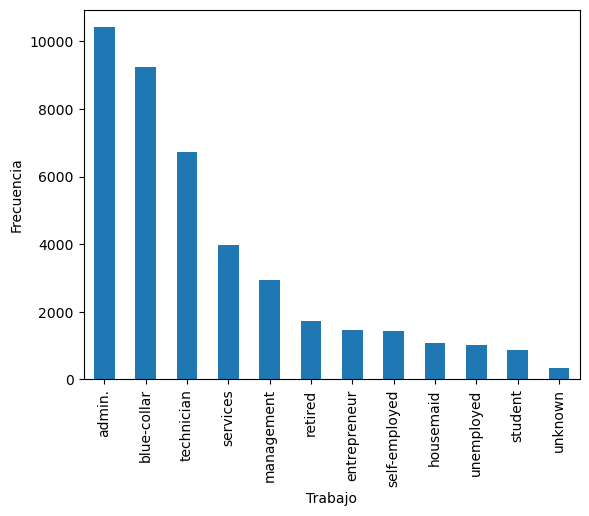

In [26]:
ax = df_cat['Trabajo'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Trabajo")

**Analisis de Outliers para la variable Estado civil**

Text(0.5, 0, 'Estado_civil')

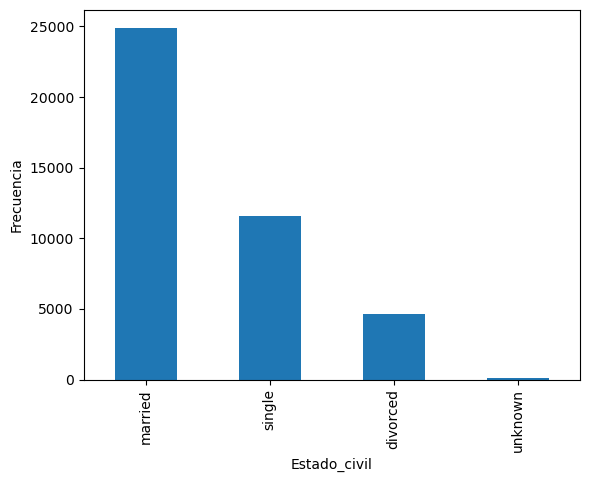

In [27]:
ax = df_cat['Estado_civil'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Estado_civil")

**Analisis de Outliers para la variable Educacion**

Text(0.5, 0, 'Educacion')

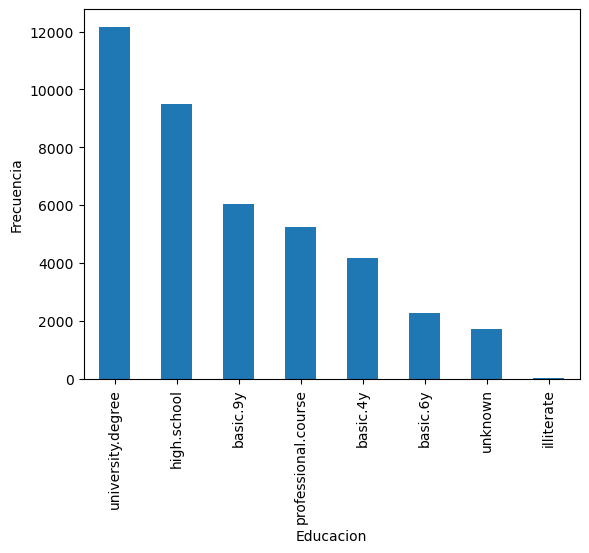

In [28]:
ax = df_cat['Educacion'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Educacion")

**Analisis de Outliers para la variable default**

Text(0.5, 0, 'default')

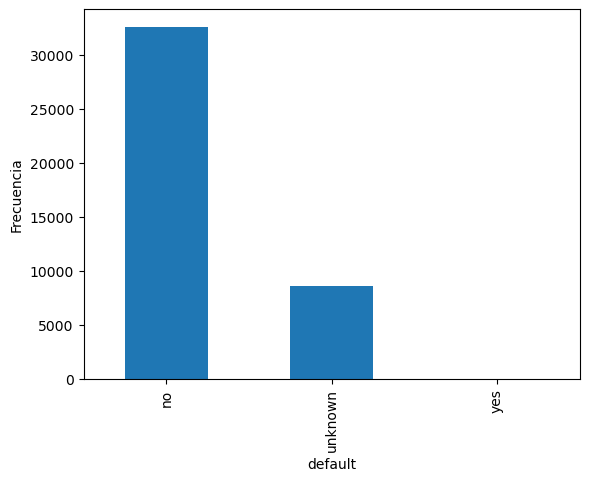

In [29]:
ax = df_cat['default'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("default")

**Analisis de Outliers para la variable Domicilio**

Text(0.5, 0, 'Domicilio')

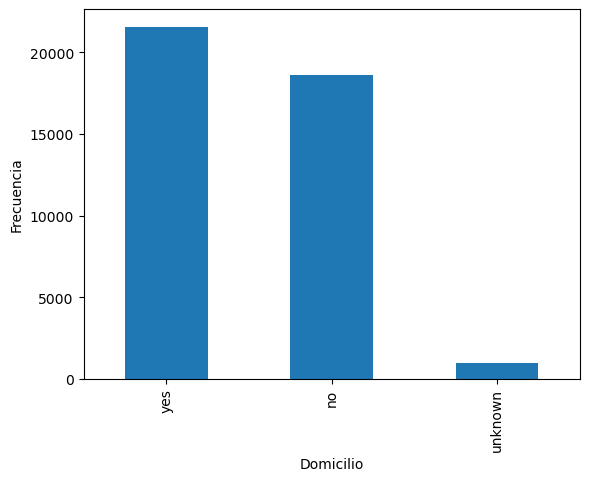

In [30]:
ax = df_cat['Domicilio'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Domicilio")

**Analisis de Outliers para la variable Prestamo**

Text(0.5, 0, 'Prestamo')

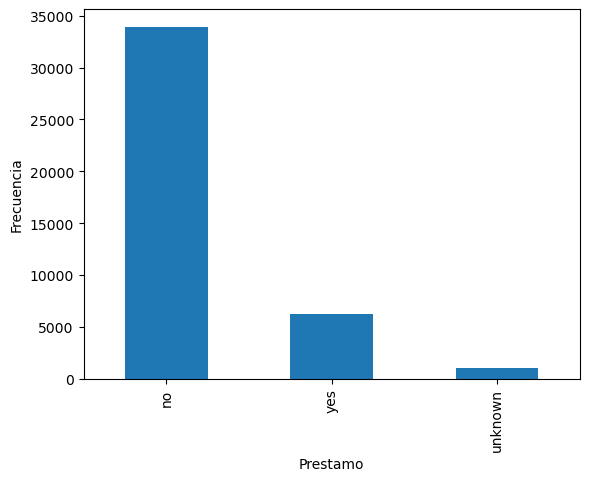

In [31]:
ax = df_cat['Prestamo'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Prestamo")

**Analisis de Outliers para la variable Mes**

Text(0.5, 0, 'Mes')

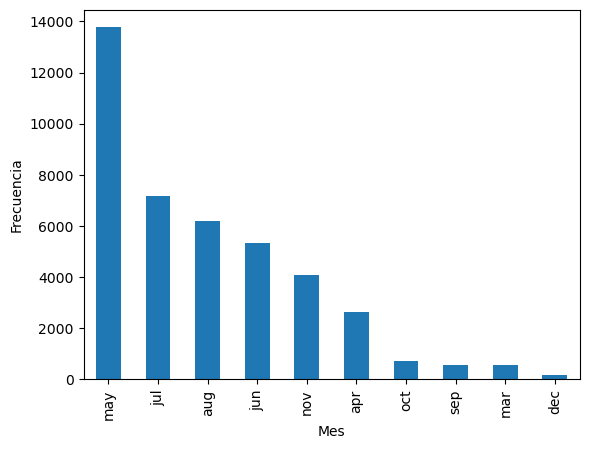

In [32]:
ax = df_cat['Mes'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Mes")

**Analisis de Outliers para la variable Poutcome**

Text(0.5, 0, 'poutcome')

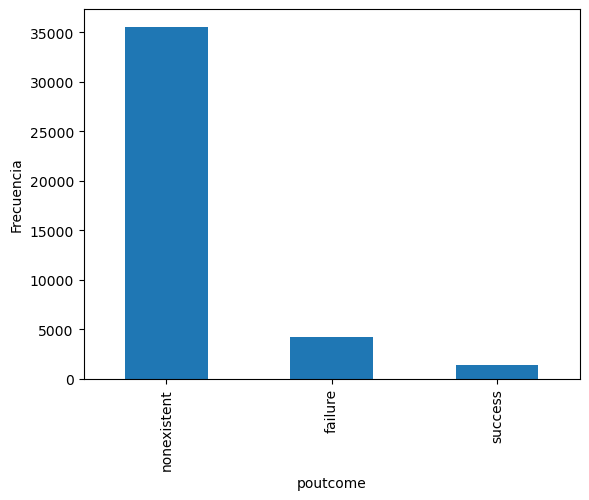

In [33]:
ax = df_cat['poutcome'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("poutcome")

Observamos que en todos estos gráficos presentan valores atípicos.

In [34]:
df_cat['Trabajo'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: Trabajo, dtype: int64

In [35]:
df_cat['Estado_civil'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: Estado_civil, dtype: int64

In [36]:
df_cat['Educacion'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: Educacion, dtype: int64

In [37]:
df_cat['Domicilio'].value_counts()

yes        21571
no         18615
unknown      990
Name: Domicilio, dtype: int64

In [38]:
df_cat['Prestamo'].value_counts()

no         33938
yes         6248
unknown      990
Name: Prestamo, dtype: int64

In [39]:
df_cat['Mes'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: Mes, dtype: int64

In [40]:
df_cat['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [41]:
df_cat['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [42]:
df_cat['Trabajo'].value_counts()*100/len(df_cat)

admin.          25.304
blue-collar     22.472
technician      16.366
services         9.634
management       7.101
retired          4.172
entrepreneur     3.536
self-employed    3.451
housemaid        2.574
unemployed       2.463
student          2.125
unknown          0.801
Name: Trabajo, dtype: float64

In [43]:
df_cat['Estado_civil'].value_counts()*100/len(df_cat)

married    60.523
single     28.084
divorced   11.198
unknown     0.194
Name: Estado_civil, dtype: float64

In [44]:
df_cat['Educacion'].value_counts()*100/len(df_cat)

university.degree     29.541
high.school           23.101
basic.9y              14.681
professional.course   12.726
basic.4y              10.142
basic.6y               5.564
unknown                4.201
illiterate             0.044
Name: Educacion, dtype: float64

In [45]:
df_cat['default'].value_counts()*100/len(df_cat)

no        79.116
unknown   20.876
yes        0.007
Name: default, dtype: float64

In [46]:
df_cat['Domicilio'].value_counts()*100/len(df_cat)

yes       52.387
no        45.208
unknown    2.404
Name: Domicilio, dtype: float64

In [47]:
df_cat['Prestamo'].value_counts()*100/len(df_cat)

no        82.422
yes       15.174
unknown    2.404
Name: Prestamo, dtype: float64

In [48]:
df_cat['Mes'].value_counts()*100/len(df_cat)

may   33.435
jul   17.411
aug   14.999
jun   12.915
nov    9.957
apr    6.390
oct    1.741
sep    1.384
mar    1.326
dec    0.442
Name: Mes, dtype: float64

In [49]:
df_cat['poutcome'].value_counts()*100/len(df_cat)

nonexistent   86.339
failure       10.326
success        3.334
Name: poutcome, dtype: float64

**Imputar por un valor preestablecido para cada variable analizada**

In [50]:
anterior = ['unknown']
actual = ['student']
df_cat['Trabajo']= df_cat['Trabajo'].replace(anterior,actual)
df_cat['Trabajo'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
student           1205
housemaid         1060
unemployed        1014
Name: Trabajo, dtype: int64

In [51]:
anterior = ['unknown']
actual = ['divorced']
df_cat['Estado_civil']= df_cat['Estado_civil'].replace(anterior,actual)
df_cat['Estado_civil'].value_counts()

married     24921
single      11564
divorced     4691
Name: Estado_civil, dtype: int64

In [52]:
anterior = ['illiterate','unknown','basic.6y']
actual = ['basic.9y','professional.course','basic.4y']
df_cat['Educacion']= df_cat['Educacion'].replace(anterior,actual)
df_cat['Educacion'].value_counts()

university.degree      12164
high.school             9512
professional.course     6970
basic.4y                6467
basic.9y                6063
Name: Educacion, dtype: int64

In [53]:
anterior = ['yes']
actual = ['unknown']
df_cat['default']= df_cat['default'].replace(anterior,actual)
df_cat['default'].value_counts()

no         32577
unknown     8599
Name: default, dtype: int64

In [54]:
anterior = ['unknown']
actual = ['no']
df_cat['Domicilio']= df_cat['Domicilio'].replace(anterior,actual)
df_cat['Domicilio'].value_counts()

yes    21571
no     19605
Name: Domicilio, dtype: int64

In [55]:
anterior = ['unknown']
actual = ['yes']
df_cat['Prestamo']= df_cat['Prestamo'].replace(anterior,actual)
df_cat['Prestamo'].value_counts()

no     33938
yes     7238
Name: Prestamo, dtype: int64

In [56]:
anterior = ['dec','mar','sep','oct']
actual = ['may','jul','apr','nov']
df_cat['Mes']= df_cat['Mes'].replace(anterior,actual)
df_cat['Mes'].value_counts()

may    13949
jul     7715
aug     6176
jun     5318
nov     4817
apr     3201
Name: Mes, dtype: int64

In [65]:
anterior = ['success']
actual = ['failure']
df_cat['poutcome']= df_cat['poutcome'].replace(anterior,actual)
df_cat['poutcome'].value_counts()

nonexistent    35551
failure         5625
Name: poutcome, dtype: int64

### Columnas Numéricas

In [66]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            41176 non-null  int64  
 1   duration        41176 non-null  int64  
 2   Campaña         41176 non-null  int64  
 3   pdays           41176 non-null  int64  
 4   previous        41176 non-null  int64  
 5   emp.var.rate    41176 non-null  float64
 6   cons.price.idx  41176 non-null  float64
 7   cons.conf.idx   41176 non-null  float64
 8   euribor3m       41176 non-null  float64
 9   nr.employed     41176 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.5 MB


**Análisis de la variable "Edad"**

#### Corte de Negocio

<Axes: >

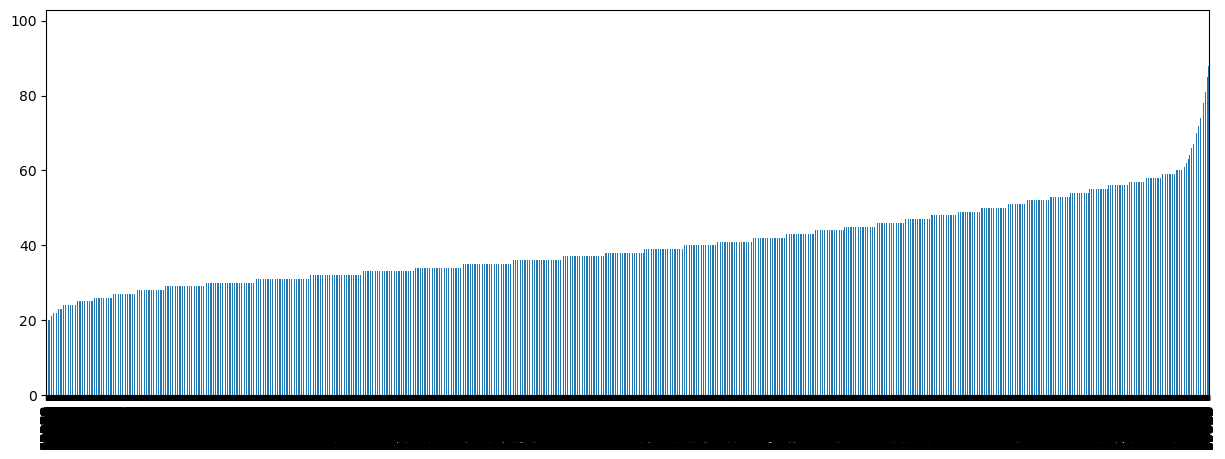

In [67]:
df_num['Edad'].sort_values(ascending=True).plot.bar(figsize=(15,5))

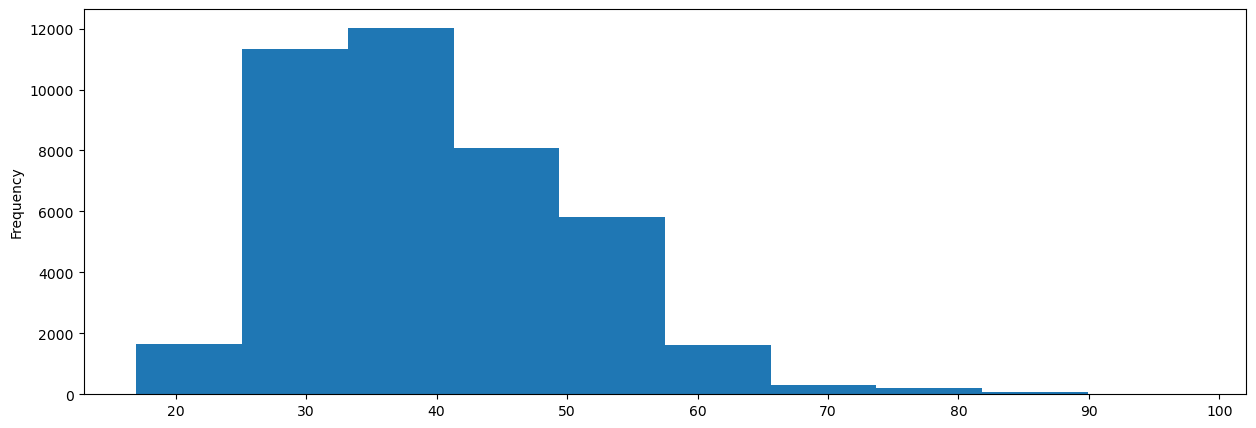

In [68]:
df_num['Edad'].plot.hist(figsize=(15,5));

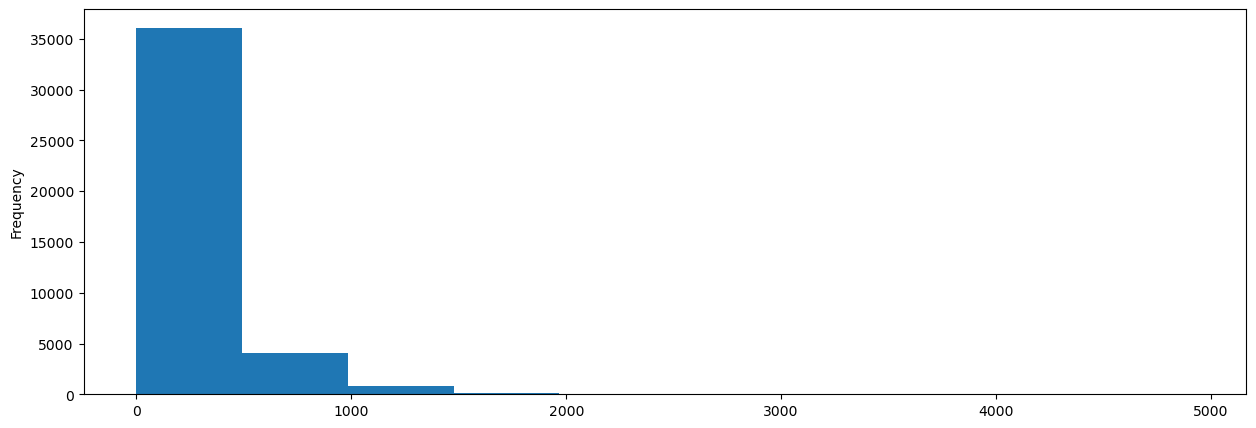

In [69]:
df_num['duration'].plot.hist(figsize=(15,5));

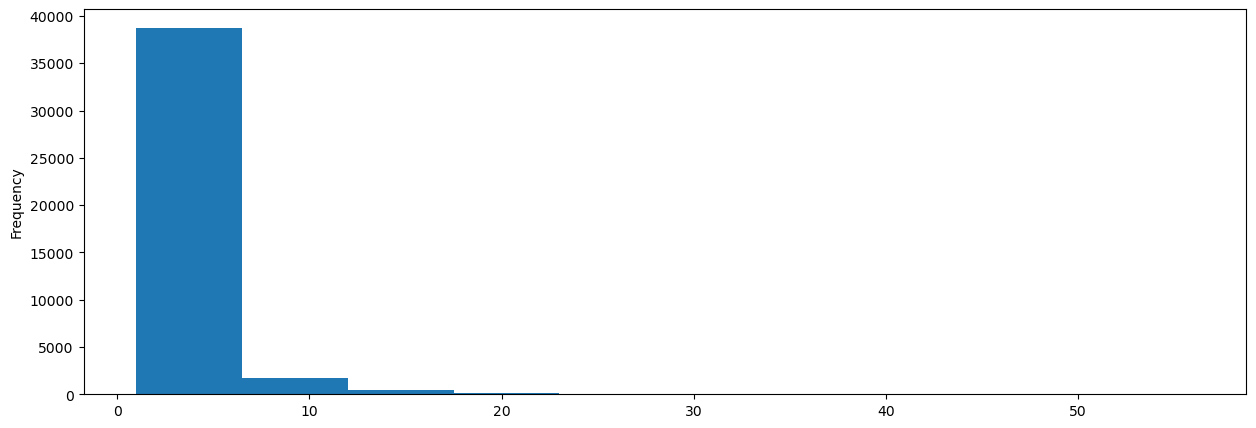

In [70]:
df_num['Campaña'].plot.hist(figsize=(15,5));

# EDA(Exploratory Data Analysis)

In [71]:
df1=df[(df['Deposito_a_plazo_bancario']=='yes')&(df['Estado_civil']=='married')].groupby('Deposito_a_plazo_bancario').count().reset_index()
df2=df[(df['Deposito_a_plazo_bancario']=='no')&(df['Estado_civil']=='married')].groupby('Deposito_a_plazo_bancario').count().reset_index()
df1=df1[['Deposito_a_plazo_bancario','Estado_civil']]
df2=df2[['Deposito_a_plazo_bancario','Estado_civil']]
df1

,Deposito_a_plazo_bancario,Estado_civil
0,yes,2531


In [72]:
df2

,Deposito_a_plazo_bancario,Estado_civil
0,no,22390


In [73]:
df3=pd.concat([df1,df2],axis=0)
df3

,Deposito_a_plazo_bancario,Estado_civil
0,yes,2531
0,no,22390


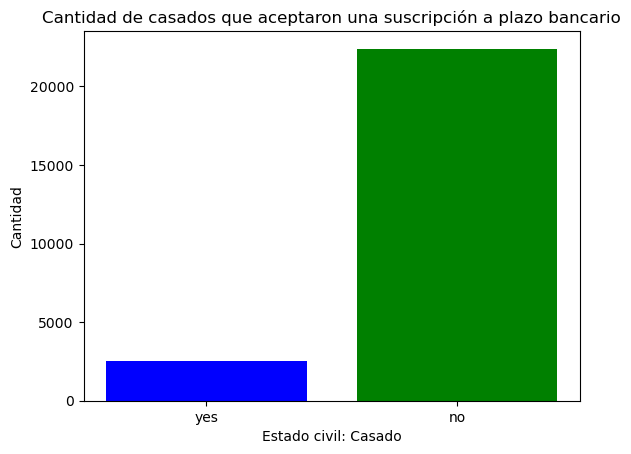

In [74]:
plt.title("Cantidad de casados que aceptaron una suscripción a plazo bancario")
plt.ylabel("Cantidad")
plt.xlabel("Estado civil: Casado")
plt.bar(df3['Deposito_a_plazo_bancario'],df3['Estado_civil'],color=['b','g'])

plt.show()

### De qué nivel educativo vienen siendo los que se suscriben a un deposito a plazo bancario?

In [75]:
df1=df[(df['Educacion']!=' ')&(df['Deposito_a_plazo_bancario']=='yes')].groupby('Educacion').count().reset_index()
df1=df1[['Educacion','Deposito_a_plazo_bancario']]
df1

,Educacion,Deposito_a_plazo_bancario
0,basic.4y,428
1,basic.6y,188
2,basic.9y,473
3,high.school,1031
4,illiterate,4
5,professional.course,595
6,university.degree,1669
7,unknown,251


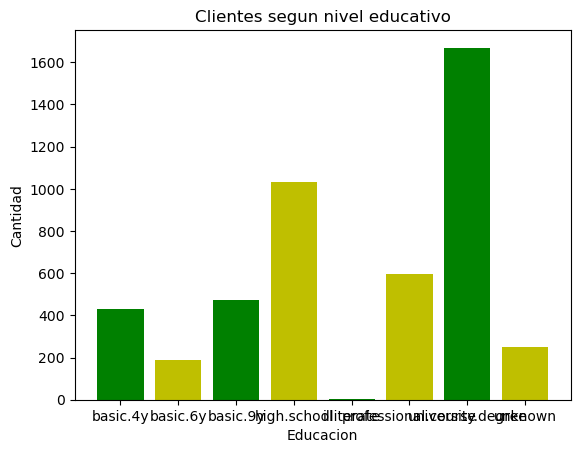

In [76]:
plt.title("Clientes segun nivel educativo")
plt.ylabel("Cantidad")
plt.xlabel("Educacion")
plt.bar(df1['Educacion'],df1['Deposito_a_plazo_bancario'],color=['g','y'])
plt.rcParams['figure.figsize']=(10,5)
plt.show()

### De las personas que solicitaron un préstamo qué porcentaje se suscribió a un depósito a plazo bancario?

In [77]:
df1=df[(df['Prestamo']=='yes')&(df['Deposito_a_plazo_bancario']=='yes')].groupby('Prestamo').count().reset_index()
df2=df[(df['Prestamo']=='no')&(df['Deposito_a_plazo_bancario']=='no')].groupby('Prestamo').count().reset_index()
df1=df1[['Prestamo','Deposito_a_plazo_bancario']]
df2=df2[['Prestamo','Deposito_a_plazo_bancario']]
df1

,Prestamo,Deposito_a_plazo_bancario
0,yes,683


In [78]:
df2

,Prestamo,Deposito_a_plazo_bancario
0,no,30089


In [79]:
df3=pd.concat([df1,df2],axis=0)
df3

,Prestamo,Deposito_a_plazo_bancario
0,yes,683
0,no,30089


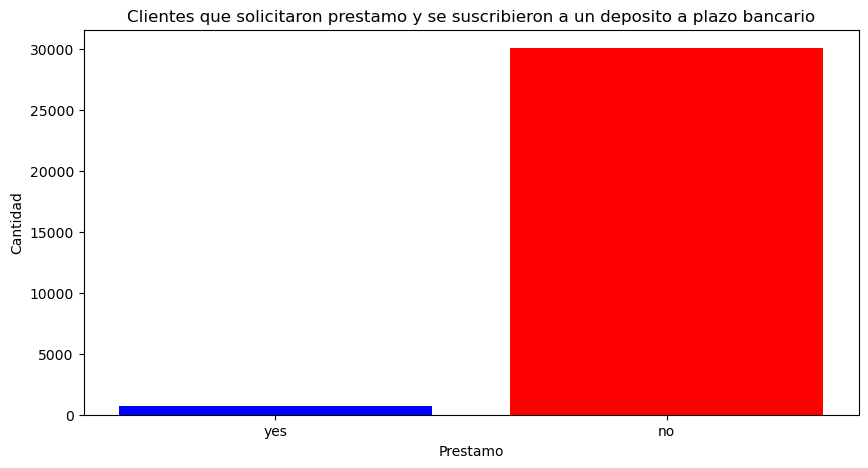

In [80]:
plt.title("Clientes que solicitaron prestamo y se suscribieron a un deposito a plazo bancario")
plt.ylabel("Cantidad")
plt.xlabel("Prestamo")
plt.bar(df3['Prestamo'],df3['Deposito_a_plazo_bancario'],color=['b','r'])
plt.rcParams['figure.figsize']=(7,4)
plt.show()

### A qué edad los cliente mayormente se suscriben a un depósito a plazo bancario?

In [81]:
df1=df[(df['Edad']!='')&(df['Deposito_a_plazo_bancario']=='yes')].groupby('Edad').count().reset_index()
df2=df[(df['Edad']!='')&(df['Deposito_a_plazo_bancario']=='no')].groupby('Edad').count().reset_index()

df1=df1[['Edad','Deposito_a_plazo_bancario']]
df2=df2[['Edad','Deposito_a_plazo_bancario']]
df1

,Edad,Deposito_a_plazo_bancario
0,17,2
1,18,12
2,19,20
3,20,23
4,21,29
...,...,...
70,87,1
71,88,9
72,89,2
73,92,3


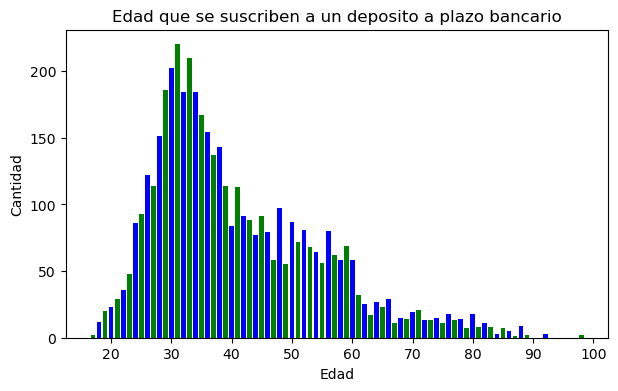

In [82]:
plt.title("Edad que se suscriben a un deposito a plazo bancario")
plt.ylabel("Cantidad")
plt.xlabel("Edad")
plt.bar(df1['Edad'],df1['Deposito_a_plazo_bancario'],color=['g','b'])
#plt.rcParams['figure.figsize']=(7,4)
plt.show()

# Data Transformation

In [83]:
df_cat=df.select_dtypes(exclude='number').copy()
df_cat

,Trabajo,Estado_civil,Educacion,default,Domicilio,Prestamo,contact,Mes,Dia_de_la_semana,poutcome,Deposito_a_plazo_bancario
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [84]:
from sklearn.preprocessing import OneHotEncoder

columnas=['Educacion','Estado_civil']
oneHE=OneHotEncoder(sparse=False,drop='first',dtype='int64')
df_oneHE=oneHE.fit_transform(df_cat[columnas])

df_oneHE=pd.DataFrame(data=df_oneHE,columns=oneHE.get_feature_names_out())
df_oneHE

C:\Users\Usuario\miniconda3\envs\upc\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Educacion_basic.6y,Educacion_basic.9y,Educacion_high.school,Educacion_illiterate,Educacion_professional.course,Educacion_university.degree,Educacion_unknown,Estado_civil_married,Estado_civil_single,Estado_civil_unknown
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
41171,0,0,0,0,1,0,0,1,0,0
41172,0,0,0,0,1,0,0,1,0,0
41173,0,0,0,0,0,1,0,1,0,0
41174,0,0,0,0,1,0,0,1,0,0


In [85]:
from sklearn.preprocessing import MinMaxScaler

columnas=['Edad']

mms=MinMaxScaler()
mms.fit(df[columnas])
df_mms=mms.transform(df[columnas])

df_mms=pd.DataFrame(data=df_mms, columns=columnas)
df_mms

,Edad
0,0.481
1,0.494
2,0.247
3,0.284
4,0.481
...,...
41171,0.691
41172,0.358
41173,0.481
41174,0.333


## Insights

In [86]:
print('Cantidad de clientes que cuentan con domicilio propio')
print('Domicilio',df['Domicilio'].value_counts())
print('\ntotal de nulos',df['Domicilio'].isnull().sum())

Cantidad de clientes que cuentan con domicilio propio
Domicilio yes        21571
no         18615
unknown      990
Name: Domicilio, dtype: int64

total de nulos 0


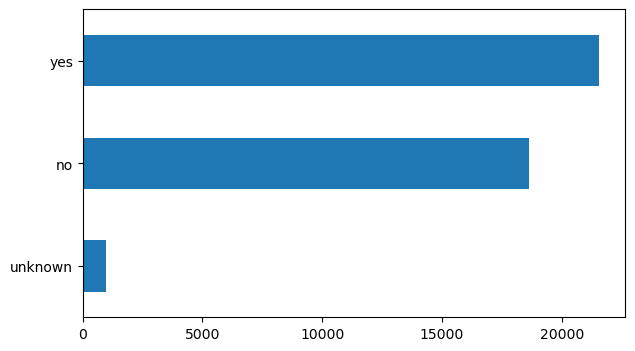

In [87]:
df['Domicilio'].value_counts(ascending=True).plot.barh();

In [88]:
print('Trabajos de los clientes')
print('Trabajos',df['Trabajo'].value_counts())
print('\ntotal de nulos',df['Trabajo'].isnull().sum())

Trabajos de los clientes
Trabajos admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: Trabajo, dtype: int64

total de nulos 0


In [89]:
print('Mes / contactos')
print('Mes',df['Mes'].value_counts())
print('\ntotal de nulos',df['Mes'].isnull().sum())

Mes / contactos
Mes may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: Mes, dtype: int64

total de nulos 0


* Train test Split ** 

# Modeling

## Regresión Logistica

Importamos la librerías correspondientes a este proceso

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Previo al entrenamiento transformamos las variables categóricas a numéricas

In [91]:
mapping = {
    'Trabajo': {
        'unemployed': 0,
        'services': 1,
        'technician': 2,
        'blue-collar': 3,
        'entrepreneur': 4,
        'self-employed': 5,
        'admin.': 6,
        'management': 7,
        'student': 8,
        'housemaid': 9,
        'retired': 10,
        'unknown': 11
    },
    'Estado_civil': {
        'single': 0,
        'married': 1,
        'divorced': 2,
        'unknown': 3
    },
    'Educacion': {
        'unknown': 0,
        'basic.4y': 1,
        'basic.6y': 2,
        'basic.9y': 3,
        'high.school': 4,
        'professional.course': 5,
        'university.degree': 6,
        'illiterate': 7
    },
    'default': {
        'no': 0,
        'yes': 1,
        'unknown': 2
    },
    'Domicilio': {
        'no': 0,
        'yes': 1,
        'unknown': 2
    },
    'Prestamo': {
        'no': 0,
        'yes': 1,
        'unknown': 2
    },
    'contact': {
        'cellular': 0,
        'telephone': 1
    },
    'Mes': {
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    },
    'Dia_de_la_semana': {
        'mon': 1,
        'tue': 2,
        'wed': 3,
        'thu': 4,
        'fri': 5
    },
    'Deposito_a_plazo_bancario':{
        'yes': 1,
        'no':0
    },
     'poutcome': {
        'nonexistent': 0,
        'failure': 1,
        'success': 2
     }
}

# Aplicar el mapeo a las columnas categóricas seleccionadas
for columna, mapeo in mapping.items():
    df[columna] = df[columna].map(mapeo)

# Mostrar el DataFrame resultante
print(df.head())

   Edad  Trabajo  Estado_civil  Educacion  default  Domicilio  Prestamo  \
0    56        9             1          1        0          0         0   
1    57        1             1          4        2          0         0   
2    37        1             1          4        0          1         0   
3    40        6             1          2        0          0         0   
4    56        1             1          4        0          0         1   

   contact  Mes  Dia_de_la_semana  ...  Campaña  pdays  previous  poutcome  \
0        1    5                 1  ...        1    999         0         0   
1        1    5                 1  ...        1    999         0         0   
2        1    5                 1  ...        1    999         0         0   
3        1    5                 1  ...        1    999         0         0   
4        1    5                 1  ...        1    999         0         0   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0     

In [137]:
df.head(5)

,Edad,Trabajo,Estado_civil,Educacion,default,Domicilio,Prestamo,contact,Mes,Dia_de_la_semana,duration,Campaña,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposito_a_plazo_bancario
0,56,9,1,1,0,0,0,1,5,1,261,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0
1,57,1,1,4,2,0,0,1,5,1,149,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0
2,37,1,1,4,0,1,0,1,5,1,226,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0
3,40,6,1,2,0,0,0,1,5,1,151,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0
4,56,1,1,4,0,0,1,1,5,1,307,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0


Observamos que todos los valores sean solo numeros.

## Instanciar el objeto

In [93]:
modelo_Reglogistica = LogisticRegression(solver = 'liblinear')

## Separamos variables independientes (X) y la target o variable a predecir (y)

In [94]:
X = df.drop(columns = ['Deposito_a_plazo_bancario'])
y = df['Deposito_a_plazo_bancario']

## Separar conjunto de datos de train y test

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenar el modelo

In [96]:
modelo_Reglogistica.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Prediccion

In [97]:
y_pred_RLog       = modelo_Reglogistica.predict(X_test)
print(y_pred_RLog)
y_pred_RLog_proba = modelo_Reglogistica.predict_proba(X_test)
print(y_pred_RLog_proba)
y_pred_RLog_proba[:,1]

[1 0 0 ... 0 0 0]
[[0.0089321  0.9910679 ]
 [0.92909534 0.07090466]
 [0.69903586 0.30096414]
 ...
 [0.99479087 0.00520913]
 [0.9847195  0.0152805 ]
 [0.99097484 0.00902516]]


array([0.9910679 , 0.07090466, 0.30096414, ..., 0.00520913, 0.0152805 ,
       0.00902516])

## Evaluación

In [98]:
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, classification_report, accuracy_score, precision_score, recall_score

In [99]:
confusion_matrix_RLog = confusion_matrix(y_test,y_pred_RLog)

In [100]:
pd.DataFrame(confusion_matrix_RLog, columns = ['Predicción NO','Predicción SI'] , index =['Real NO','Real SI'])

,Predicción NO,Predicción SI
Real NO,7070,195
Real SI,591,380


In [101]:
TN = confusion_matrix_RLog[0][0]
FP = confusion_matrix_RLog[0][1] #error tipo I
FN = confusion_matrix_RLog[1][0] #error tipo II
TP = confusion_matrix_RLog[1][1]

In [102]:
accuracy = (TP + TN) / (TN + FP + FN + TP)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
especificidad = TN / (TN + FP)

print(accuracy)
print(recall)
print(precision)
print(especificidad)

0.9045653229723166
0.3913491246138002
0.6608695652173913
0.9731589814177564


In [103]:
f1 = (2*precision*recall)/ (precision+recall)
print (f1)

0.49159120310478643


In [104]:
auc_rlog = roc_auc_score(y_test,y_pred_RLog)
print(auc_rlog)

0.6822540530157782


# Algoritmo de Decision Tree v2 (Clasificación)

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
modelo_DecisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth=7)

In [107]:
modelo_DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [108]:
y_pred_DecisionTree       = modelo_DecisionTree.predict(X_test)
print(y_pred_DecisionTree)
y_pred_DecisionTree_proba = modelo_DecisionTree.predict_proba(X_test)
print(y_pred_DecisionTree_proba)
y_pred_DecisionTree_proba[:,1]

[1 0 1 ... 0 0 0]
[[0.41605839 0.58394161]
 [0.99439348 0.00560652]
 [0.42934783 0.57065217]
 ...
 [0.99439348 0.00560652]
 [0.99439348 0.00560652]
 [0.99439348 0.00560652]]


array([0.58394161, 0.00560652, 0.57065217, ..., 0.00560652, 0.00560652,
       0.00560652])

In [109]:
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [110]:
confusion_matrix_DesicionTree = confusion_matrix(y_test,y_pred_DecisionTree)

In [111]:
pd.DataFrame(confusion_matrix_DesicionTree,columns = ['Prediccion NO','Prediccion SI'], index = ['Real NO','Real SI'])

,Prediccion NO,Prediccion SI
Real NO,7032,233
Real SI,513,458


In [112]:
TN = confusion_matrix_DesicionTree[0][0]
FP = confusion_matrix_DesicionTree[0][1] #tipo I
FN = confusion_matrix_DesicionTree[1][0] #tipo II
TP = confusion_matrix_DesicionTree[1][1]
print( TN , FP, FN, TP)

7032 233 513 458


In [113]:
#Accuracy
ac =  (TP + TN) / (TP + TN + FP + FN)
#Recall
rc = (TP) / (TP + FN)
#Precision
pr = (TP) / (TP + FP)
#Especificidad TNR
es = (TN) / (TN + FP)
#F1-score
f1=(2*pr*rc)/(pr+rc)
#AUC 
auc_DecisionTree = roc_auc_score(y_test,y_pred_DecisionTree)
print(auc_DecisionTree)
print(f1)
print(es)
print(rc)
print(ac)
print(pr)

0.7198035528609086
0.5511432009626955
0.9679284239504473
0.47167868177136973
0.9094220495386109
0.662807525325615


In [114]:
from sklearn import tree

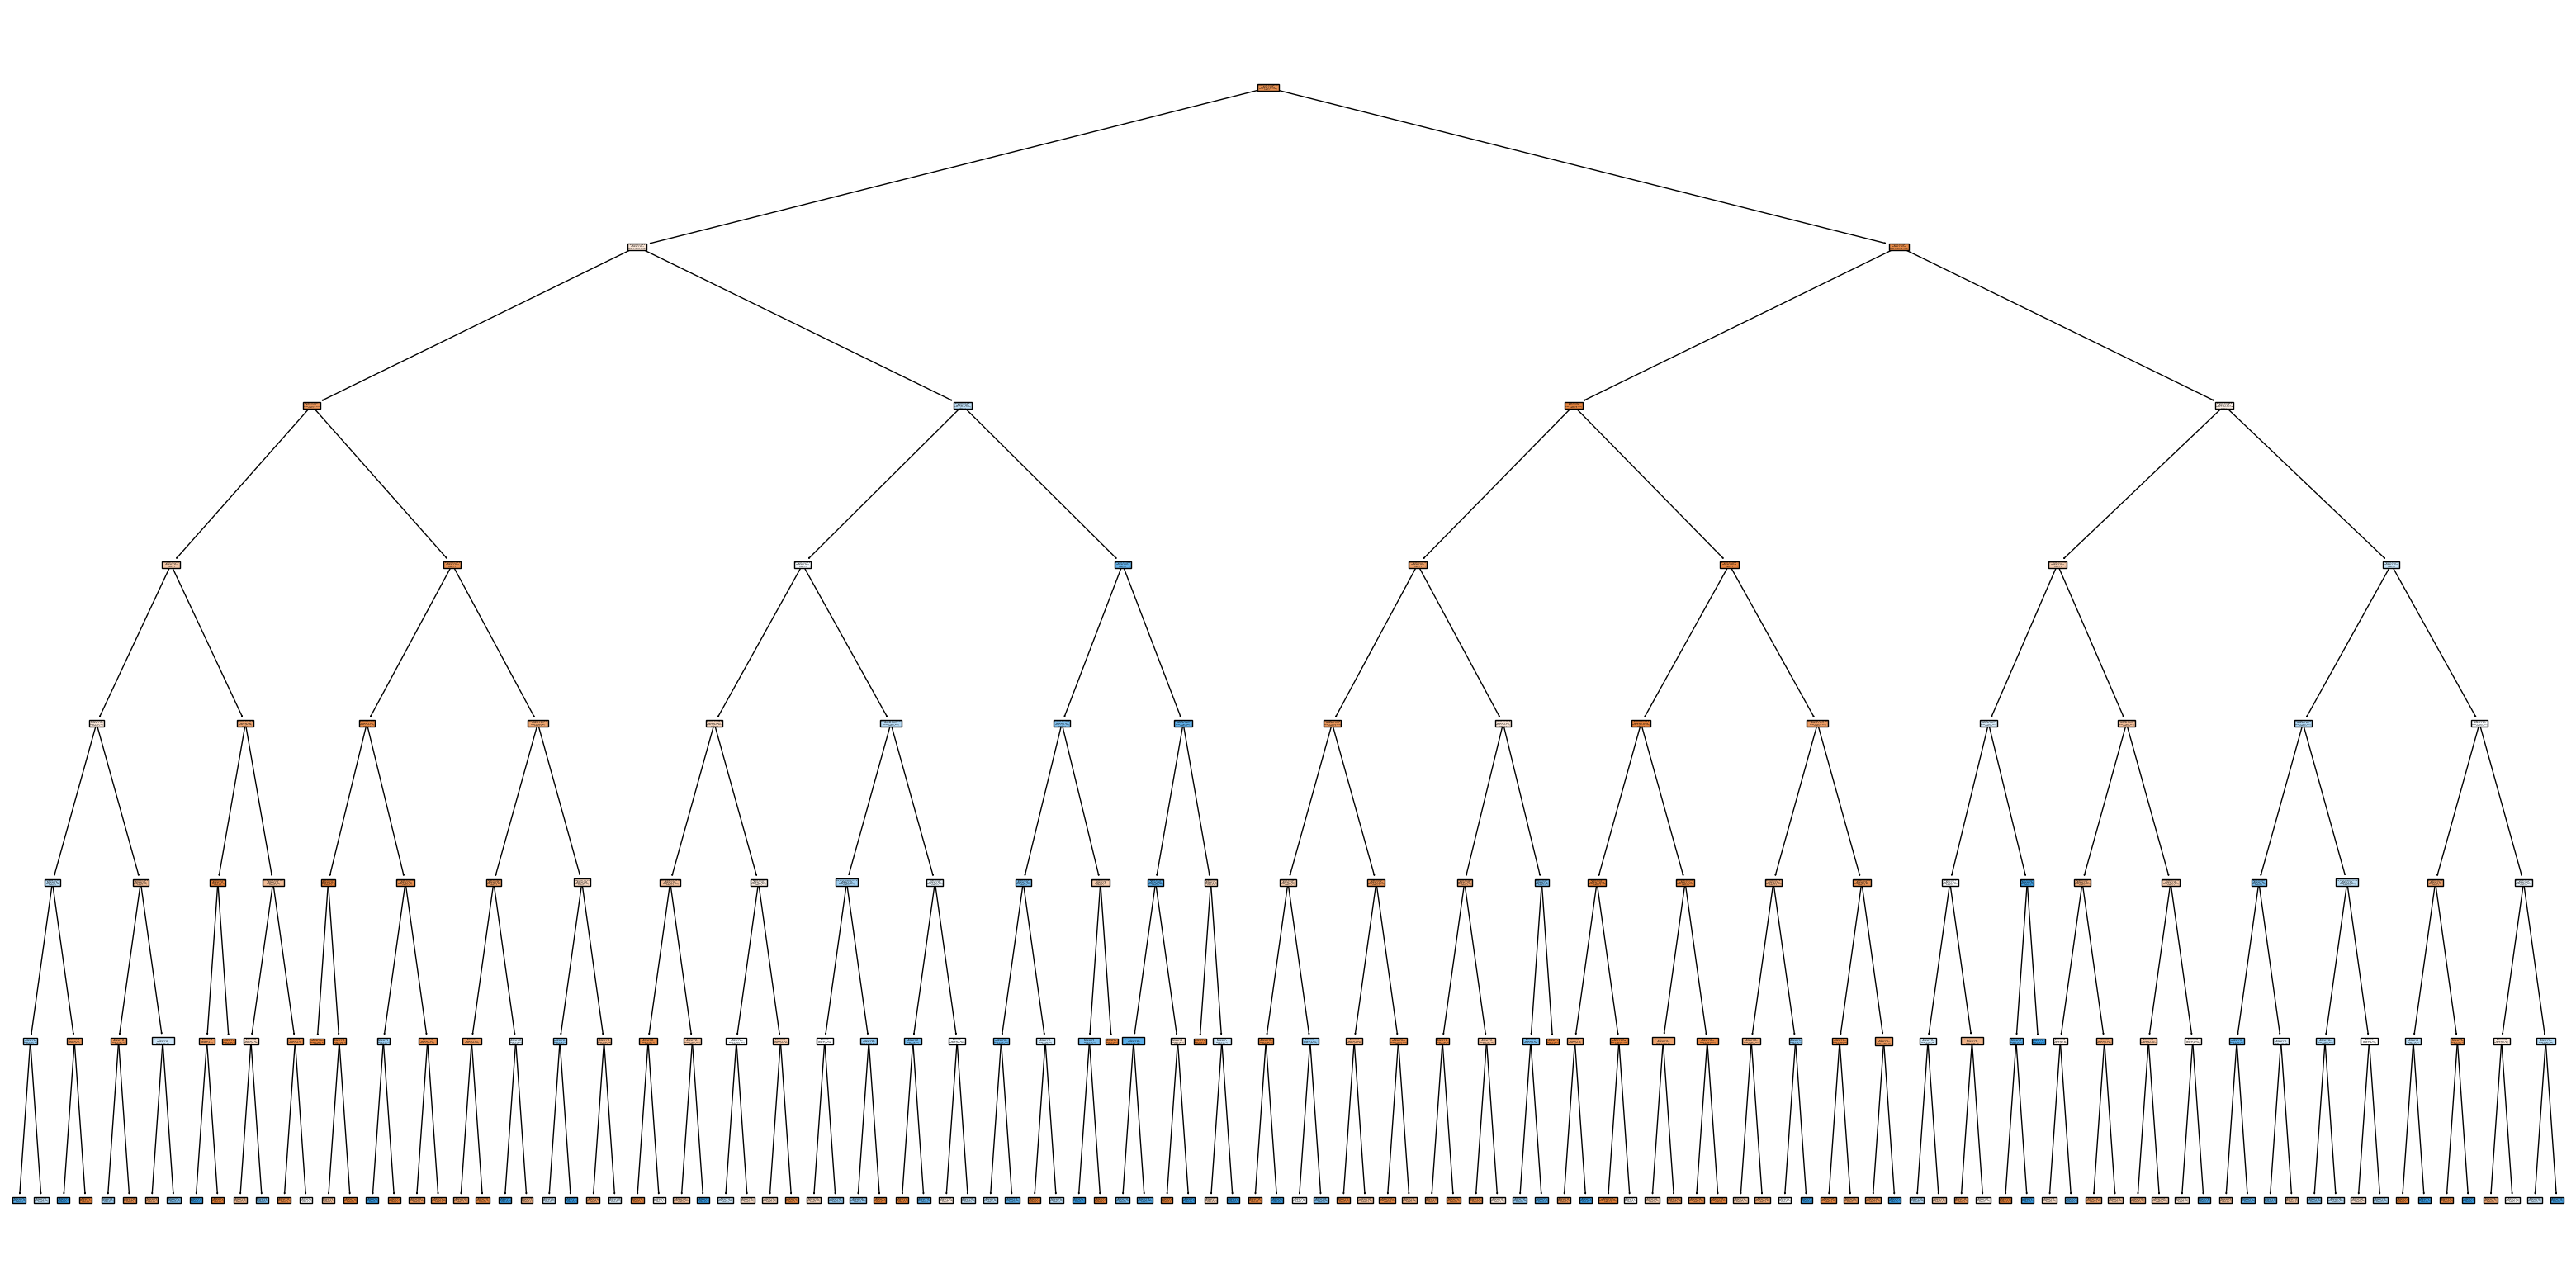

In [115]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(modelo_DecisionTree, 
                   feature_names=X.columns,  
                   class_names=['1','0'],
                   filled=True)

In [116]:
import graphviz
# DOT data

dot_data = tree.export_graphviz(modelo_DecisionTree, out_file=None, 
                                feature_names=X.columns,  
                                node_ids=True,
                                rounded=True,
                                #proportion=True,
                                class_names=['1','0'],
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
modelo_DecisionTree.get_depth()

In [ ]:
modelo_DecisionTree.get_n_leaves()

In [ ]:
X_test

In [ ]:
nodo = modelo_DecisionTree.apply(X_test)
nodo[:1]

# Optimización

 Balanceo de Datos

Carga de Librerías del Proyecto

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

# Contenido del Archivo

In [125]:
df.head(n=5)

,Edad,Trabajo,Estado_civil,Educacion,default,Domicilio,Prestamo,contact,Mes,Dia_de_la_semana,...,Campaña,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposito_a_plazo_bancario
0,56,9,1,1,0,0,0,1,5,1,...,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0
1,57,1,1,4,2,0,0,1,5,1,...,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0
2,37,1,1,4,0,1,0,1,5,1,...,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0
3,40,6,1,2,0,0,0,1,5,1,...,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0
4,56,1,1,4,0,0,1,1,5,1,...,1,999,0,0,1.100,93.994,-36.400,4.857,5191.000,0


In [126]:
print(df.shape)

print(pd.value_counts(df['Deposito_a_plazo_bancario'],sort=True))

print(df['Deposito_a_plazo_bancario'].value_counts(normalize=True)*100)

(41176, 21)
0    36537
1     4639
Name: Deposito_a_plazo_bancario, dtype: int64
0   88.734
1   11.266
Name: Deposito_a_plazo_bancario, dtype: float64


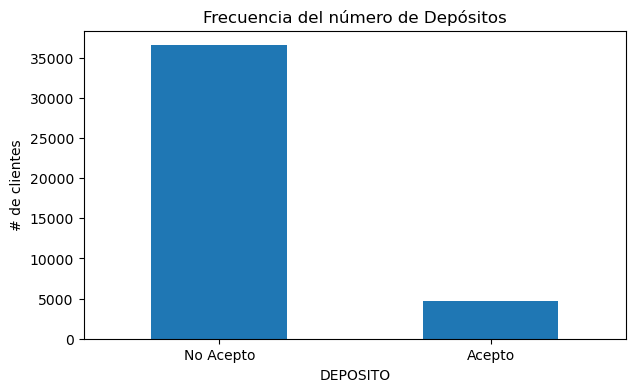

In [127]:
count_classes=pd.value_counts(df['Deposito_a_plazo_bancario'],sort=True)
count_classes.plot(kind='bar',rot=0)
LABELS=("No Acepto","Acepto")
plt.xticks(range(2),LABELS)
plt.title("Frecuencia del número de Depósitos")
plt.xlabel("DEPOSITO")
plt.ylabel("# de clientes");

# 2. Estrategia de UNDERSAMPLING (eliminar cantidad de ceros)

* sampling_strategy=1/0>1 20/100

In [129]:
#definimos nuestras etiquetas y features
y=df['Deposito_a_plazo_bancario']
x=df.drop('Deposito_a_plazo_bancario',axis=1)

#dividimos en sets de entrenamiento y test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

rus=RandomUnderSampler()
X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)

model=run_model(X_train_rus,X_test,y_train_rus,y_test)
pred_y=model.predict(X_test)
pred_y_proba=model.predict_proba(X_test)[:,1]
mostrar_resultados(y_test,pred_y,pred_y_proba)

NameError: name 'run_model' is not defined